# Парадокс «Друг друга друга Вигнера»: может ли квантовая механика описывать пользователей квантовой механики?

Добро пожаловать в обучающий курс по коду для части серии «Парадоксы» на YouTube-канале Qiskit, посвящённой «Другу друга друга Вигнера». В этом руководстве мы поможем вам лучше понять расширение мысленного эксперимента «Друг Вигнера», включающее четырёх наблюдателей, известное как парадокс Фраухигера-Реннера. Мы упростим оригинальный мысленный эксперимент в квантовую схему, которую можно симулировать с помощью Qiskit!

Если вы ещё этого не сделали, рекомендую сначала посмотреть [наше видео](https://youtu.be/kM1EwKBWXPs?si=s7EygCUA0MJoX5s5) на YouTube-канале Qiskit, где объясняется контекст мысленного эксперимента и даётся полезный обзор кода Qiskit, который мы будем использовать в этом руководстве. Также советую ознакомиться с записью в блоге (ссылка появится позже) для более глубокого изучения фона мысленного эксперимента.

Давайте кратко рассмотрим мысленный эксперимент, симулируя каждый его шаг с помощью кода Qiskit:

### Контекст парадокса

Мысленный эксперимент был предложен Даниэлой Фраухигер и Ренатто Реннером в 2016 году. В нём участвуют четыре наблюдателя, которые используют квантовую механику для рассуждений о результатах измерений друг друга, и приходят к выводу, который противоречит квантовой механике.

Это расширение парадокса «Друг Вигнера», поэтому я назвал его «Друг друга друга Вигнера». В квантовом сообществе его часто называют парадоксом Фраухигера-Реннера или расширенным мысленным экспериментом «Друг Вигнера». Если вы ещё не видели моё [предыдущее видео о Друге Вигнера](https://www.youtube.com/watch?v=TMBK88Mpg5U&t=0s), рекомендую посмотреть его перед этим.

Вот краткое напоминание о схеме, которую я использовал для представления мысленного эксперимента «Друг Вигнера»:

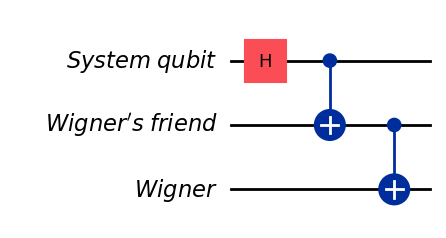

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name="System qubit")
qr2 = QuantumRegister(1, name="Wigner's friend")
qr3 = QuantumRegister(1, name="Wigner")

qc= QuantumCircuit(qr1, qr2, qr3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.draw("mpl")


Друг Вигнера измеряет кубит в суперпозиции, а затем Вигнер спрашивает своего друга, какой результат он получил. Если наблюдение вызывает необратимый коллапс, Вигнер и его друг не соглашаются, когда этот коллапс произошёл, каждый считая, что его наблюдение стало причиной коллапса. Однако, если рассматривать и Вигнера, и его друга как квантовые системы, противоречие исчезает: их измерения заключаются в том, что они становятся запутанными с измеряемой системой, что моделируется вентилями CNOT в схеме.

Ситуация становится сложнее, если Вигнер заводит ещё пару друзей.

### Расширение парадокса «Друг Вигнера»

Давайте введём новый набор из четырёх наблюдателей: Алису, Боба, Шарлотту и Дэнни, чтобы избежать путаницы с «другом Вигнера», «другом друга Вигнера» и так далее!

Начнём с Алисы и Боба, которые будут измерять по одному кубиту. Как и в предыдущей схеме с Вигнером и его другом, мы будем представлять воспоминания Алисы и Боба как кубиты, которые будут сохранять результаты их измерений.

Сейчас я покажу первую часть сегодняшней квантовой схемы, а затем объясню каждый вентиль по шагам, чтобы прояснить его роль в мысленном эксперименте: 

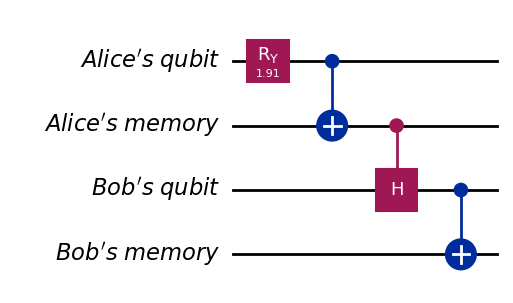

In [2]:
import numpy as np
from qiskit.circuit.library import CHGate

qr1 = QuantumRegister(1, name="Alice's qubit")
qr2 = QuantumRegister(1, name="Alice's memory")
qr3 = QuantumRegister(1, name="Bob's qubit")
qr4 = QuantumRegister(1, name="Bob's memory")

qc = QuantumCircuit(qr1, qr2, qr3, qr4)

# Prepare Alice's qubit
theta = 2 * np.arcsin(np.sqrt(2/3))
qc.ry(theta, 0)

# Alice's measurement
qc.cx(0, 1)

# Prepare Bob's qubit
qc.ch(1, 2)

# Bob's measurement
qc.cx(2, 3)

qc.draw("mpl")


Первый вентиль — это Y-ротационный вентиль, который подготавливает кубит Алисы в состоянии суперпозиции, где вероятность измерить 0 составляет 1/3, а вероятность измерить 1 составляет 2/3:

$$\sqrt{\frac{1}{3}}|0\rangle + \sqrt{\frac{2}{3}}|1\rangle$$

Далее вентиль CNOT представляет измерение кубита Алисы, где она видит либо результат 0, либо результат 1:

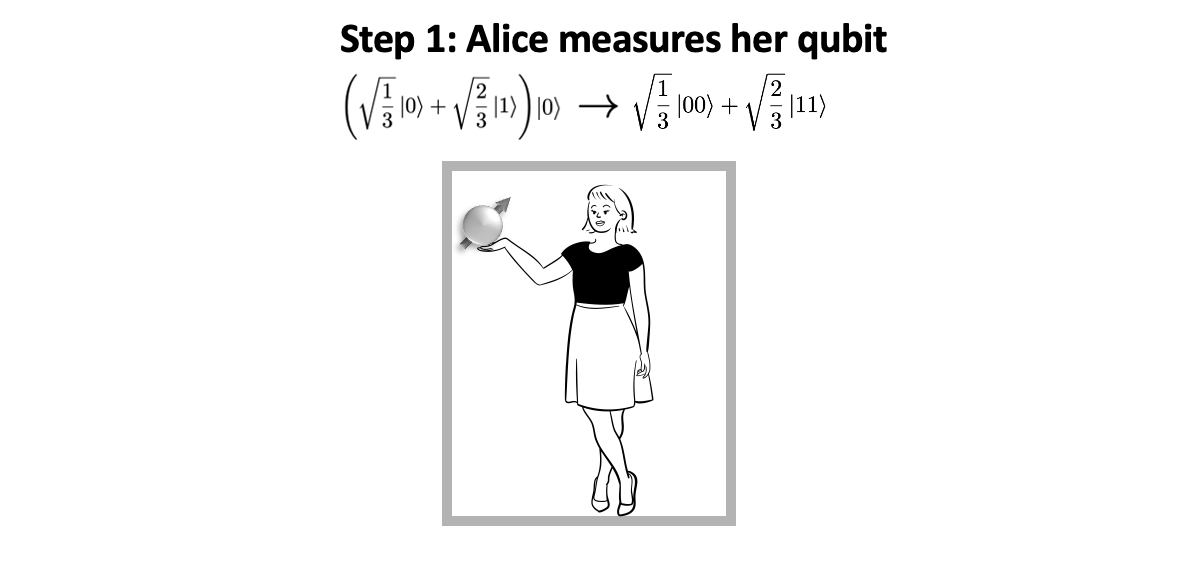

Затем Алиса подготавливает кубит Боба в зависимости от результата своего измерения. Если она измеряет 0, то подготавливает кубит Боба в состоянии 0. Если она измеряет 1, то подготавливает кубит Боба в состоянии |+⟩, то есть в равной суперпозиции 0 и 1:

$$H|0\rangle = \frac{1}{2}(|0\rangle + |1\rangle)$$

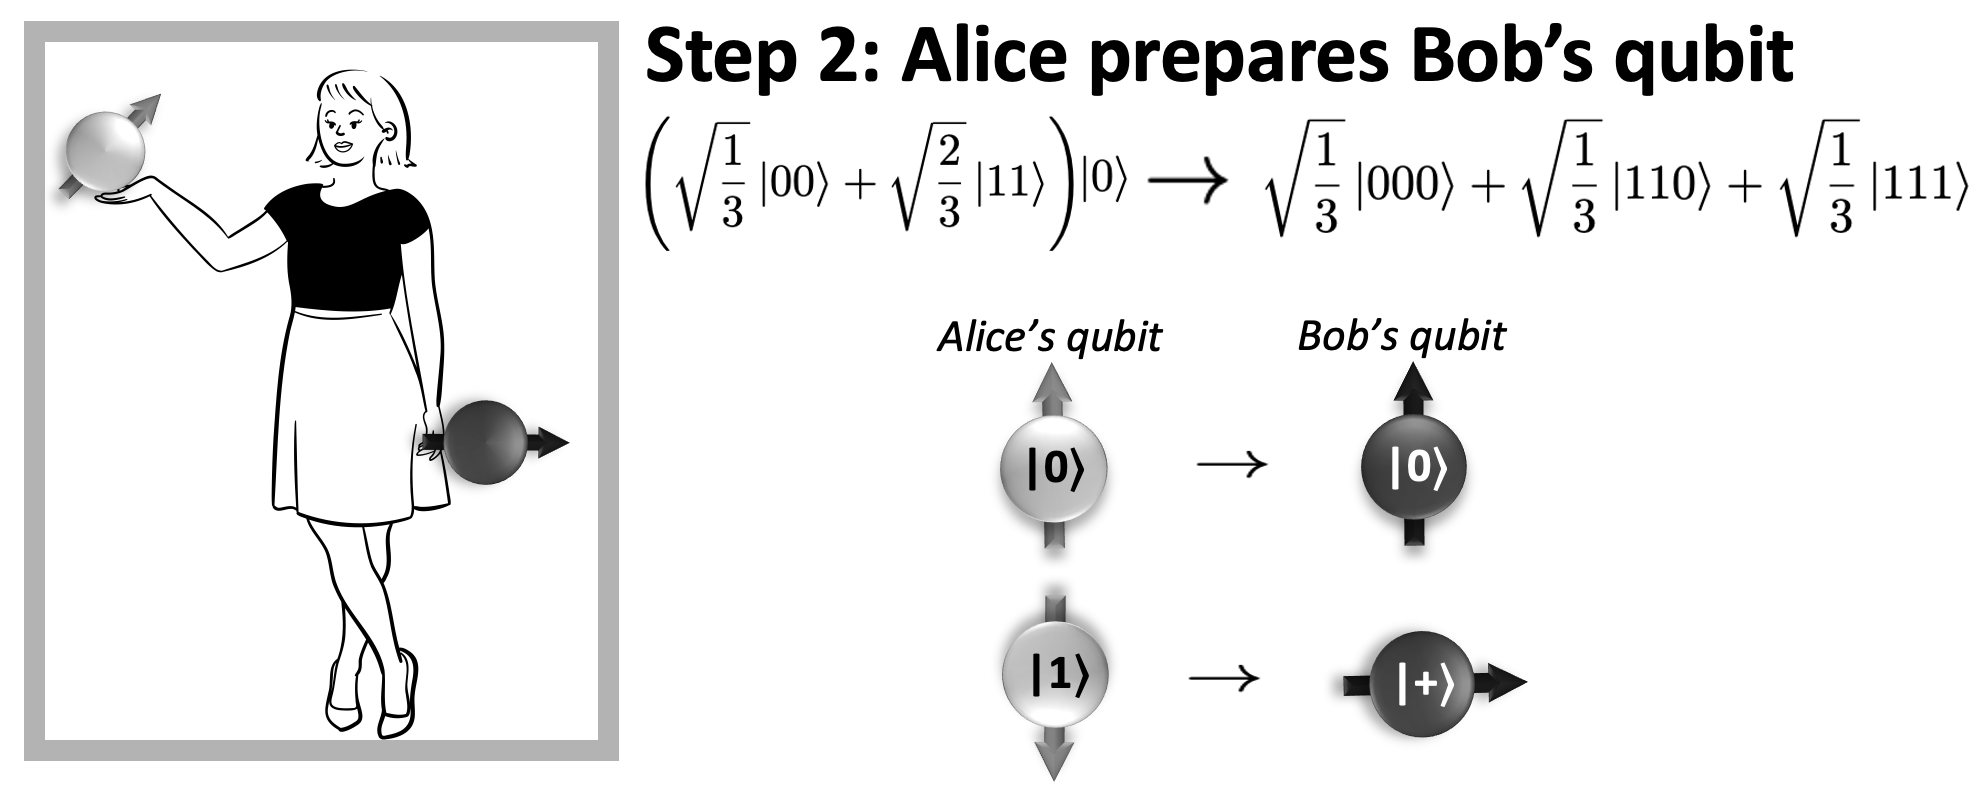

Вентиль Control-Hadamard реализует этот шаг подготовки, так как если кубит памяти Алисы равен 0, кубит Боба остаётся в его исходном состоянии 0. Если же кубит памяти Алисы равен 1, то к кубиту Боба применяется вентиль Адамара, переводя его в состояние |+⟩.

Затем Алиса передаёт этот кубит Бобу, и он его измеряет, что представлено ещё одним вентилем CNOT в нашей квантовой схеме.

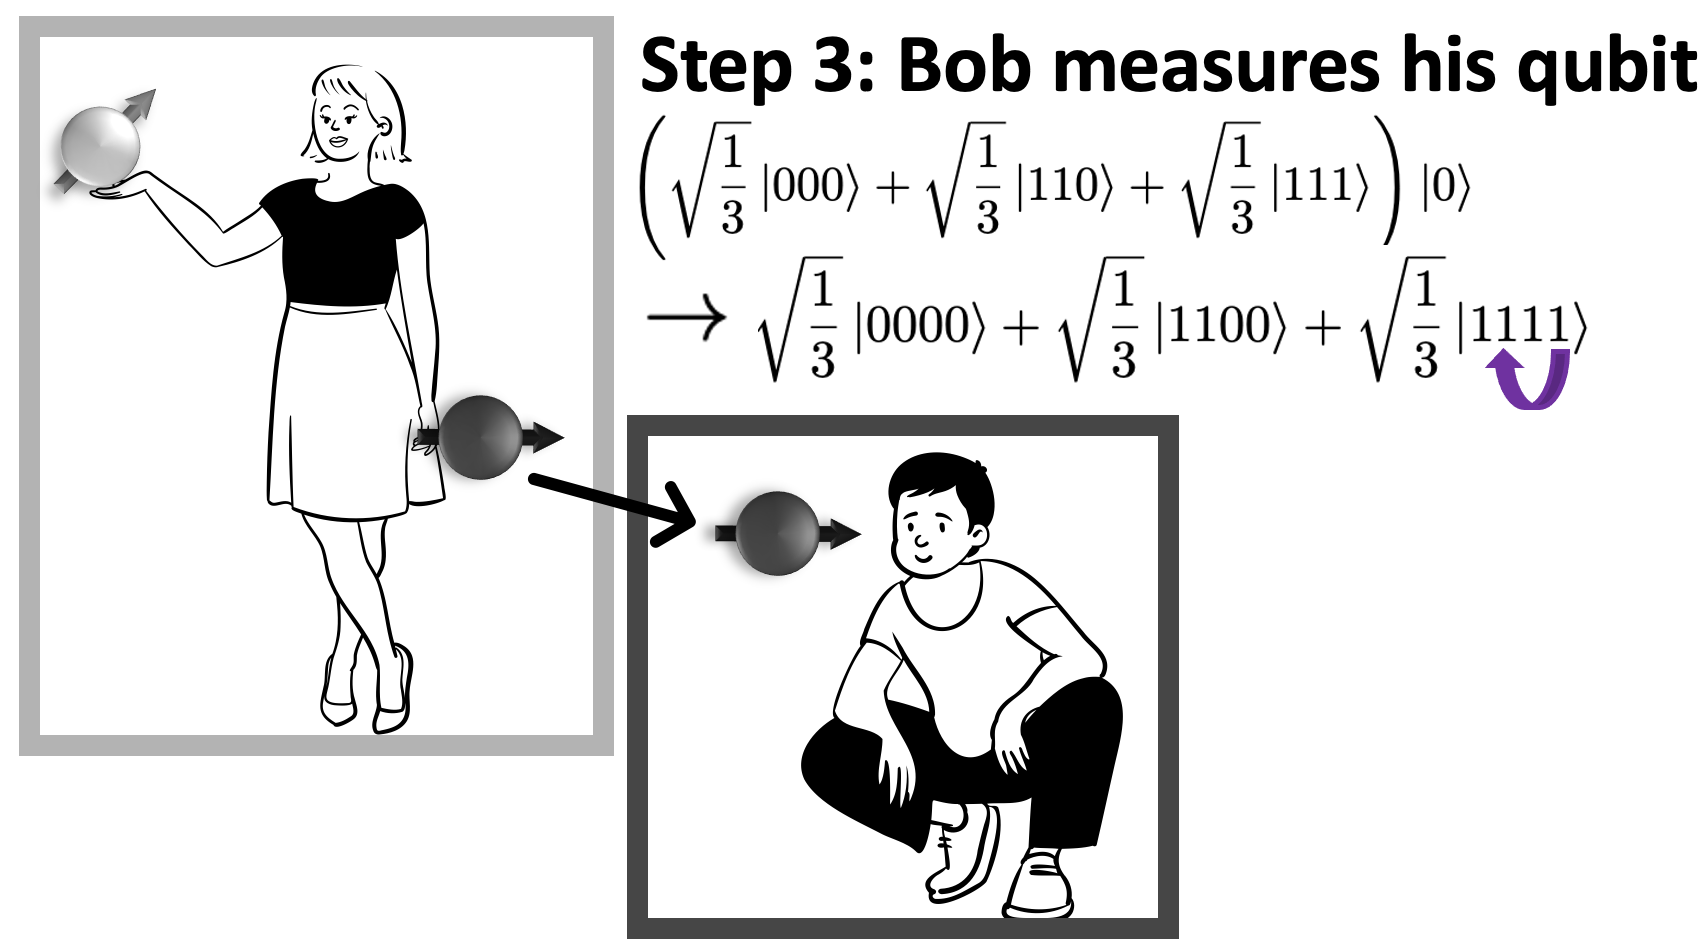

Теперь, если Боб измеряет свой кубит и обнаруживает его в состоянии 1, он точно знает, что Алиса подготовила его кубит в состоянии |+⟩, а не в состоянии 0. Таким образом, если Боб измеряет 1, он понимает, что Алиса должна была измерить 1 на своём кубите. Это можно увидеть в векторе состояния.

Давайте проверим это с помощью нашей квантовой схемы, добавив измерение кубита памяти Алисы после вентиля CNOT, чтобы узнать, что она измерила, и измерение кубита памяти Боба, чтобы увидеть его результат:

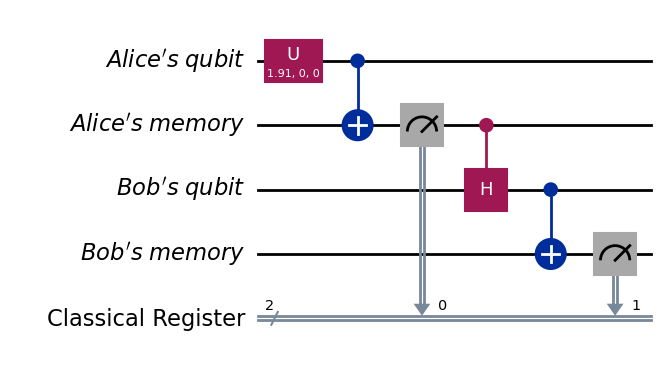

In [3]:
# Add a classical register with 2 bits
cr = ClassicalRegister(2, name="Classical Register")

# Add all the quantum and classical registers to the circuit
qc_ab = QuantumCircuit(qr1, qr2, qr3, qr4, cr)

# Prepare Alice's qubit
qc_ab.u(theta, 0, 0, 0)

# Alice's measurement
qc_ab.cx(0, 1)

# Measure the second qubit onto the first classical bit before the CH gate
qc_ab.measure(1, 0)

# Prepare Bob's qubit: controlled-Hadamard gate
qc_ab.ch(1, 2)

# Bob's measurement
qc_ab.cx(2, 3)

# Measure the fourth qubit onto the second classical bit at the end
qc_ab.measure(3, 1)

qc_ab.draw("mpl")


Давайте посмотрим на результаты, если мы измерим все кубиты на этом этапе:

In [4]:
from qiskit_aer import AerSimulator 
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Transpile the circuit to use supported gates
backend = AerSimulator()
transpiled_circuit = transpile(qc_ab, backend)

# Execute the transpiled circuit on the Aer simulator
result = backend.run(transpiled_circuit).result()

counts = result.get_counts(transpiled_circuit)

# Print the counts
print("Counts: ", counts)


Counts:  {'01': 324, '00': 365, '11': 335}


Мы видим, что измерение Бобом состояния 1 на его кубите всегда коррелирует с измерением Алисы состояния 1 на её кубите, что означает, что она подготовила кубит Боба в состоянии |+⟩.

### Добавление друзей друзей

Ситуация становится странной, когда в эксперимент входят Шарлотта и Дэнни. Алиса и её кубит изолированы в лаборатории Алисы, а Боб и его кубит — в лаборатории Боба. Шарлотта и Дэнни находятся вне этих лабораторий. Мы предполагаем, что Шарлотта и Дэнни имеют полный квантовый контроль над лабораториями Алисы и Боба, так что они могут измерять системы Алисы и Боба в любых базисах.

Затем Шарлотта измеряет объединённую систему Алисы и её кубита в базисе Белла:

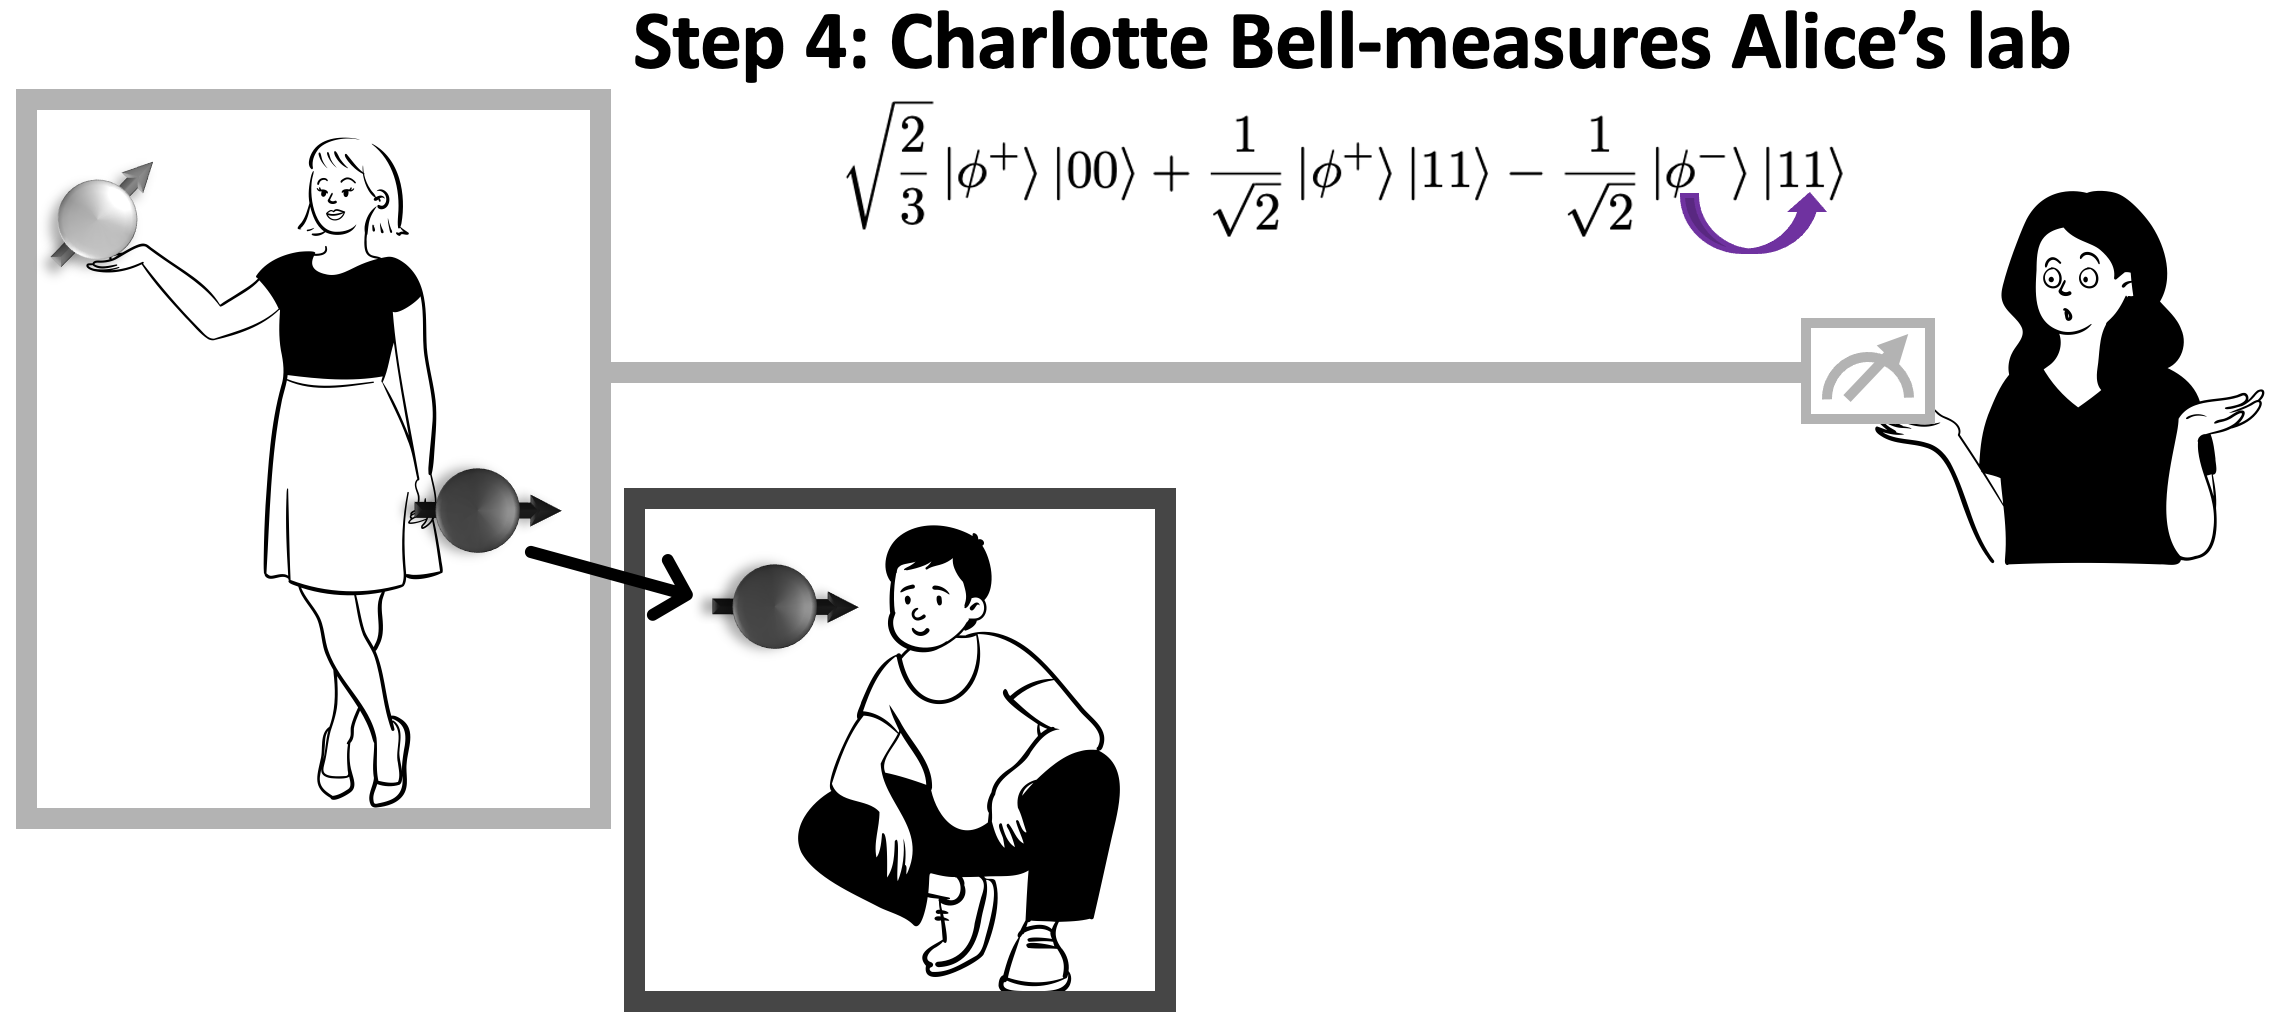

Обычно мы измеряем два кубита в Z-базисе, проецируя их в состояния 00, 01, 10 или 11.

$$
|00\rangle, |01\rangle, |10\rangle , |11\rangle.
$$

В отличие от этого, измерение в базисе Белла проецирует два кубита в одно из четырёх максимально запутанных состояний Белла: \( |00⟩ + |11⟩ \), \( |00⟩ - |11⟩ \), \( |01⟩ + |10⟩ \) и \( |01⟩ - |10⟩ \).

$$
|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right), \\
|\Phi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right), \\
|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right), \\
|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right).
$$

Мы можем реализовать измерение в базисе Белла, добавив вентиль CNOT, а затем вентиль Адамара, перед выполнением двух измерений в Z-базисе. Это похоже на то, как мы можем реализовать измерение в X-базисе, применяя вентиль Адамара перед измерением в Z-базисе.

Давайте добавим измерение Белла Шарлотты в нашу квантовую схему:

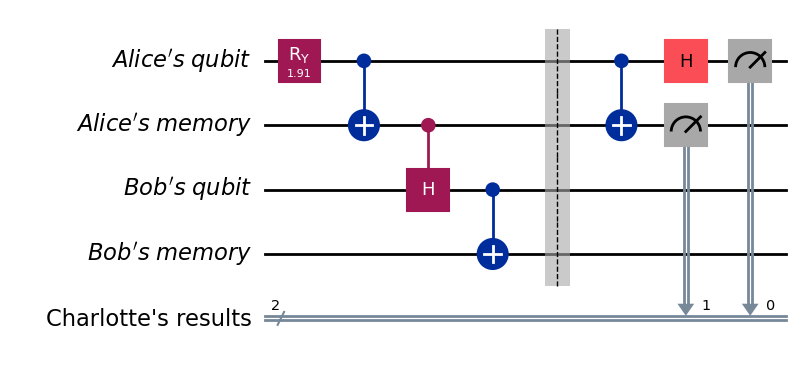

In [5]:
cr1 = ClassicalRegister(2, name="Charlotte's results")

qc.add_register(cr1)

qc.barrier()

# Bell measurement on the first pair of qubits
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw("mpl")


Если Шарлотта измеряет свои кубиты и получает результат 10, это указывает на то, что она измерила Алису и её кубит в состоянии Белла \( |00⟩ - |11⟩ \). Глядя на глобальный вектор состояния до измерения Шарлотты, мы видим, что если Алиса и её кубит находятся в этом состоянии Белла, то Боб должен был измерить 1 на своём кубите. Таким образом, когда Шарлотта получает свой результат измерения, она заключает, что Боб с уверенностью измерил 1 на своём кубите.

Давайте проверим это с помощью нашей схемы:

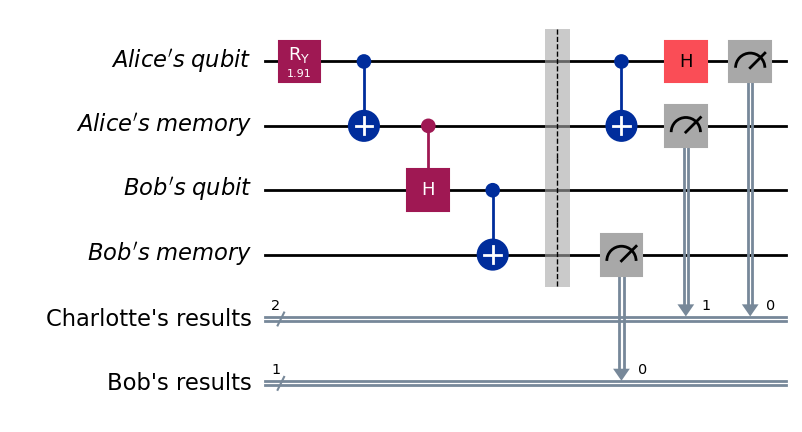

In [6]:
cr3 = ClassicalRegister(1, name="Bob's results")

qc_bc = qc.copy()
qc_bc.add_register(cr3)
qc_bc.measure(3,2)
qc_bc.draw("mpl")


In [7]:
transpiled_circuit2 = transpile(qc_bc, backend)

# Execute the transpiled circuit on the Aer simulator
result = backend.run(transpiled_circuit2).result()

counts = result.get_counts(transpiled_circuit2)

# Print the counts
print("Counts: ", counts)


Counts:  {'1 01': 151, '0 00': 695, '1 00': 178}


Мы видим, что действительно, когда Шарлотта измеряет \( 10 \), Боб всегда измеряет 1.

Ранее мы рассуждали, что если Боб измеряет 1 на своём кубите, он с уверенностью знает, что Алиса измерила 1 на своём кубите. Таким образом, когда Шарлотта получает результат \( 10 \), она может заключить, что Боб измерил 1, а следовательно, и Алиса измерила 1.

Далее, как Шарлотта сделала с Алисой, Дэнни измеряет объединённую систему Боба и его кубита в базисе Белла:

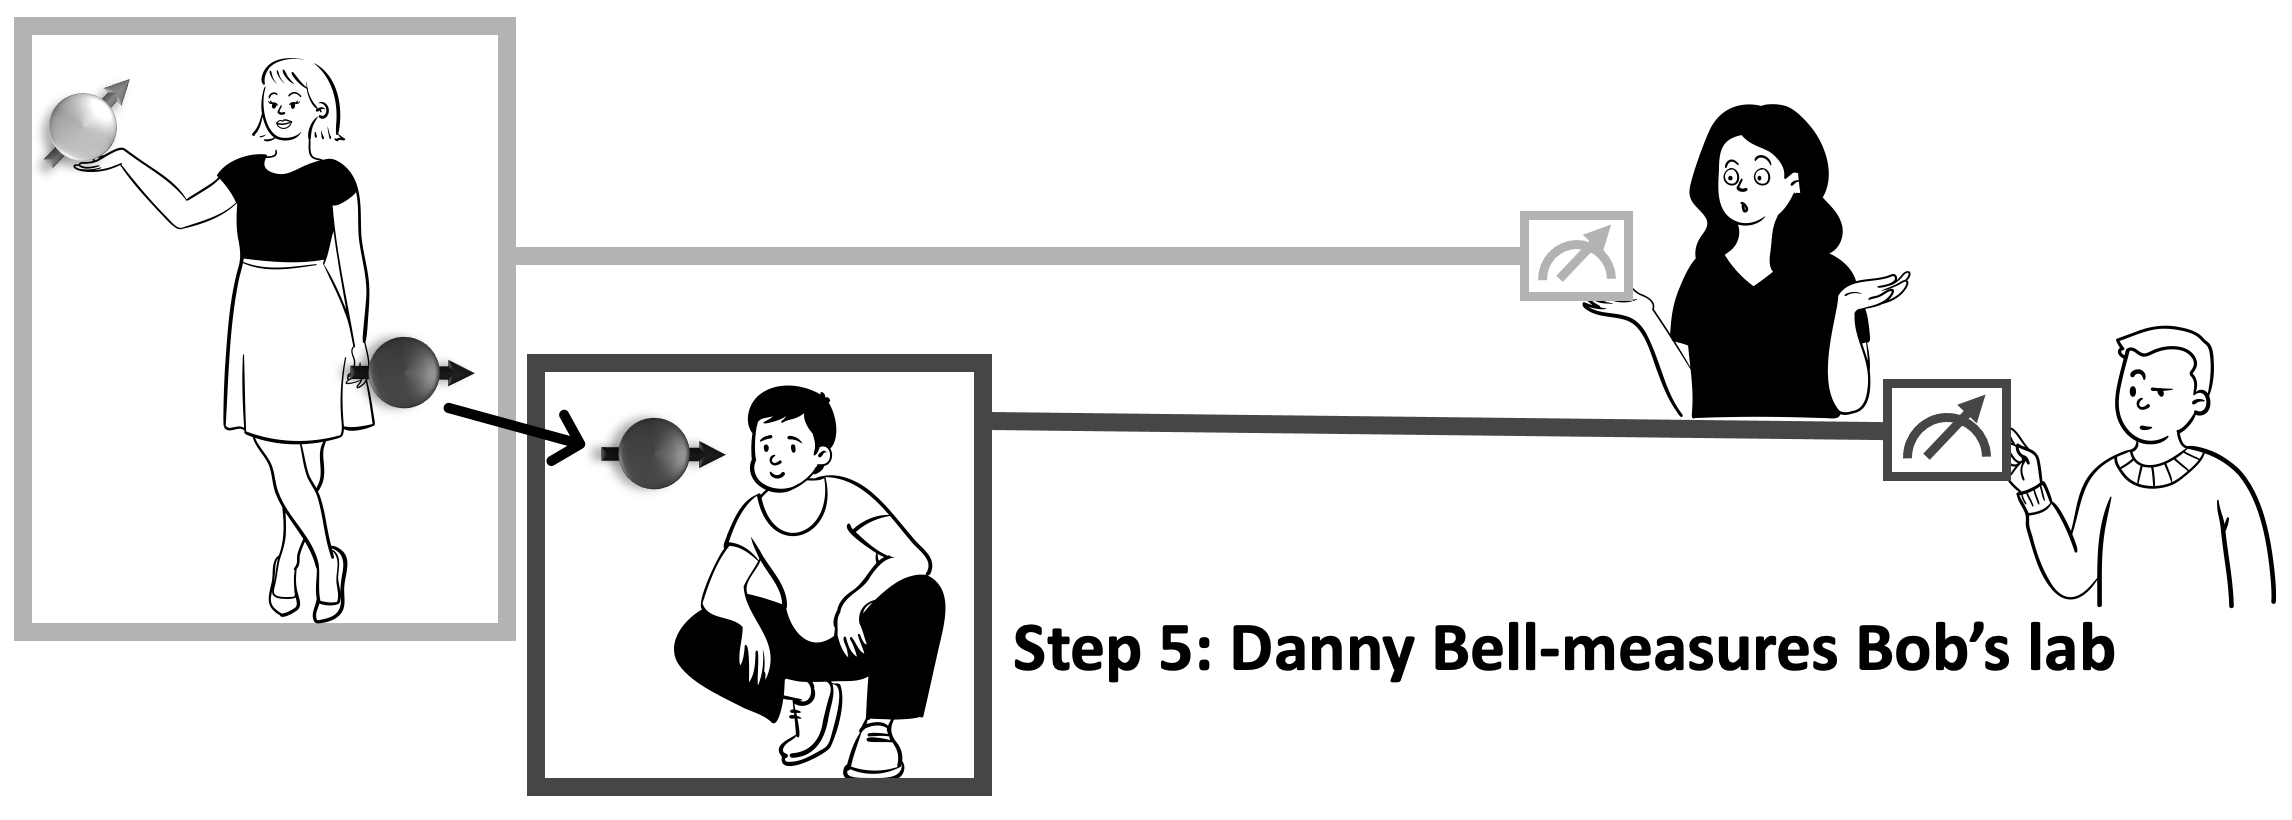

Let's add the measurement to our circuit: 

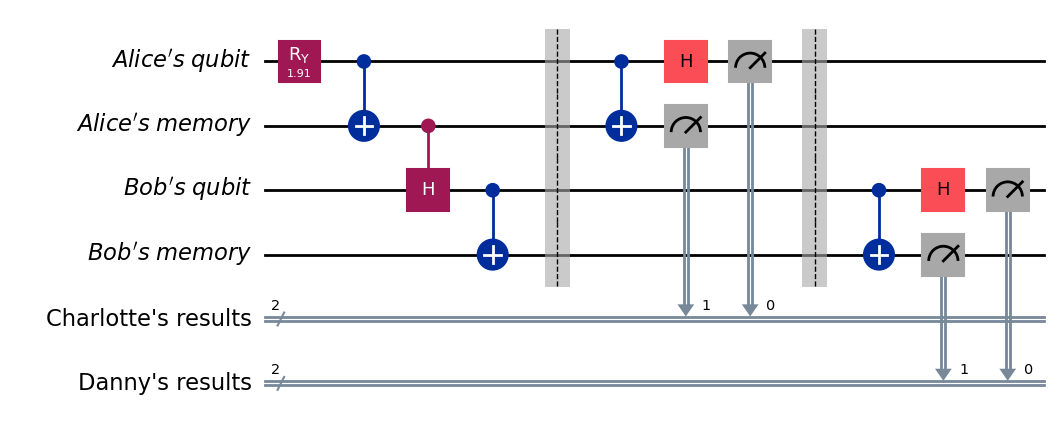

In [8]:
cr2 = ClassicalRegister(2, name="Danny's results")

qc.add_register(cr2)

qc.barrier()

# Bell measurement on the second pair of qubits
qc.cx(2, 3)
qc.h(2)
qc.measure(2, 2)
qc.measure(3, 3)

qc.draw("mpl")


Мы заключили, что если Шарлотта измеряет **01**, что соответствует состоянию Белла **ϕ⁻**, то Алиса измерила **1** на своём кубите, а значит, она должна была подготовить кубит Боба в состоянии **|+⟩**.

Теперь подумаем, что произойдёт, если Алиса подготавливает кубит Боба в состоянии **|+⟩**. Когда Боб измеряет кубит в состоянии **|+⟩**, он становится максимально запутанным с этим кубитом, и вместе они переходят в состояние Белла **ϕ⁺** (**|00⟩ + |11⟩**).

Таким образом, когда Дэнни выполняет измерение в базисе Белла, он точно обнаружит, что Боб находится в состоянии **ϕ⁺**, что будет указано результатом **00** при финальных Z-измерениях.

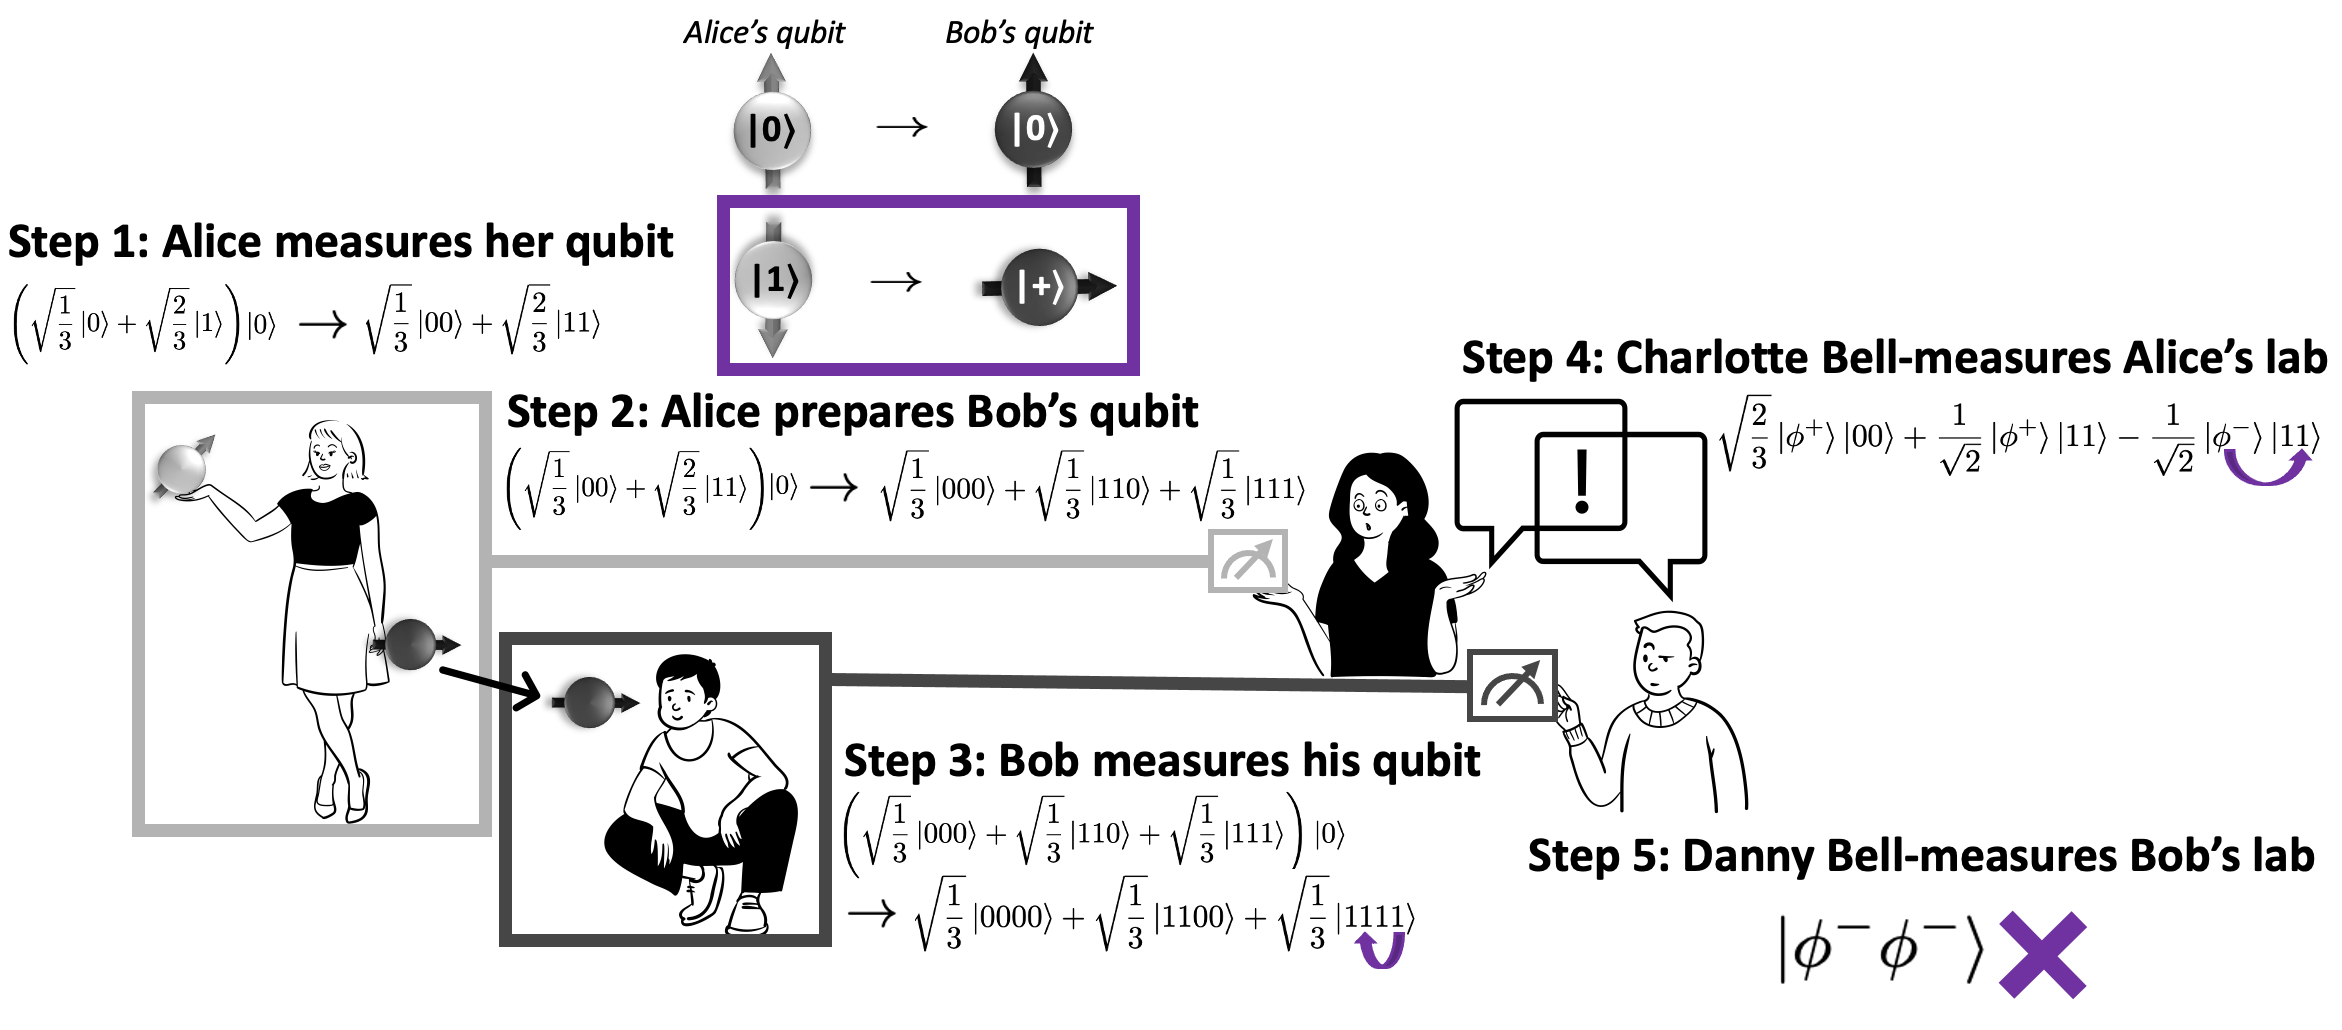

### Парадокс

Теперь наша полная цепочка рассуждений выглядит так:

- Если Шарлотта измеряет лабораторию Алисы в состоянии **ϕ⁻**, тогда Боб определённо измерил **1**.
- Следовательно, Алиса определённо измерила **1**.
- Следовательно, Дэнни определённо измерит лабораторию Боба в состоянии **ϕ⁺**.

Таким образом, никогда не должно быть измерений, где Шарлотта измеряет **ϕ⁻** (**01**) **и** Дэнни измеряет **ϕ⁻** (**01**). В терминах Z-измерений в вычислительном базисе это означает, что мы никогда не должны получить результат, где Шарлотта измеряет **01**, а Дэнни измеряет **01**.

Давайте посмотрим, что на самом деле произойдёт, если мы запустим нашу полную схему с помощью Qiskit:

In [9]:
transpiled_circuit = transpile(qc, backend)

result = backend.run(transpiled_circuit).result()

counts = result.get_counts(transpiled_circuit)

print("Counts: ", counts)


Counts:  {'00 01': 90, '01 00': 85, '01 01': 74, '00 00': 775}


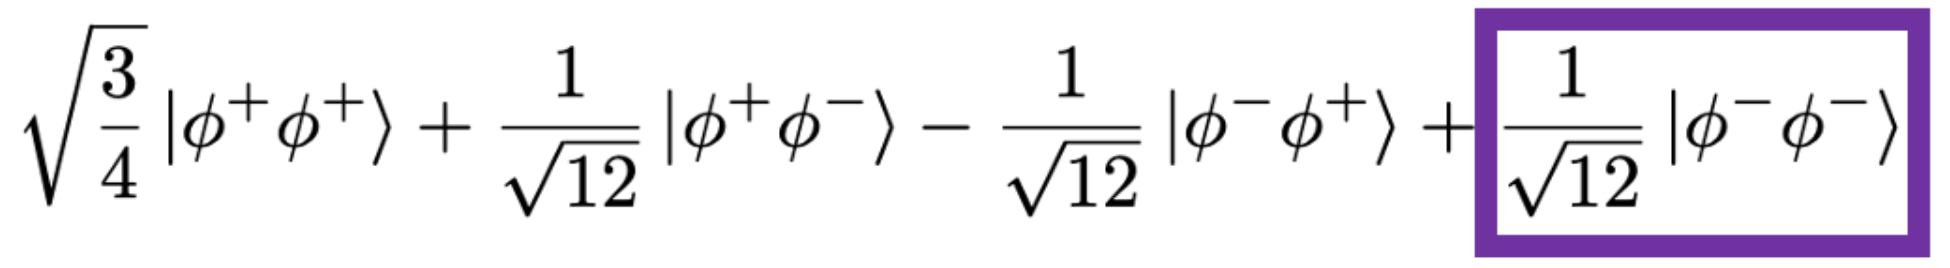

Вы можете увидеть, запустив схему, что у нас есть парадокс! Шарлотта и Дэнни действительно могут оба измерить **01**. Оказывается, они могут получить этот результат с вероятностью **1/12**, как это видно из глобального вектора состояния.

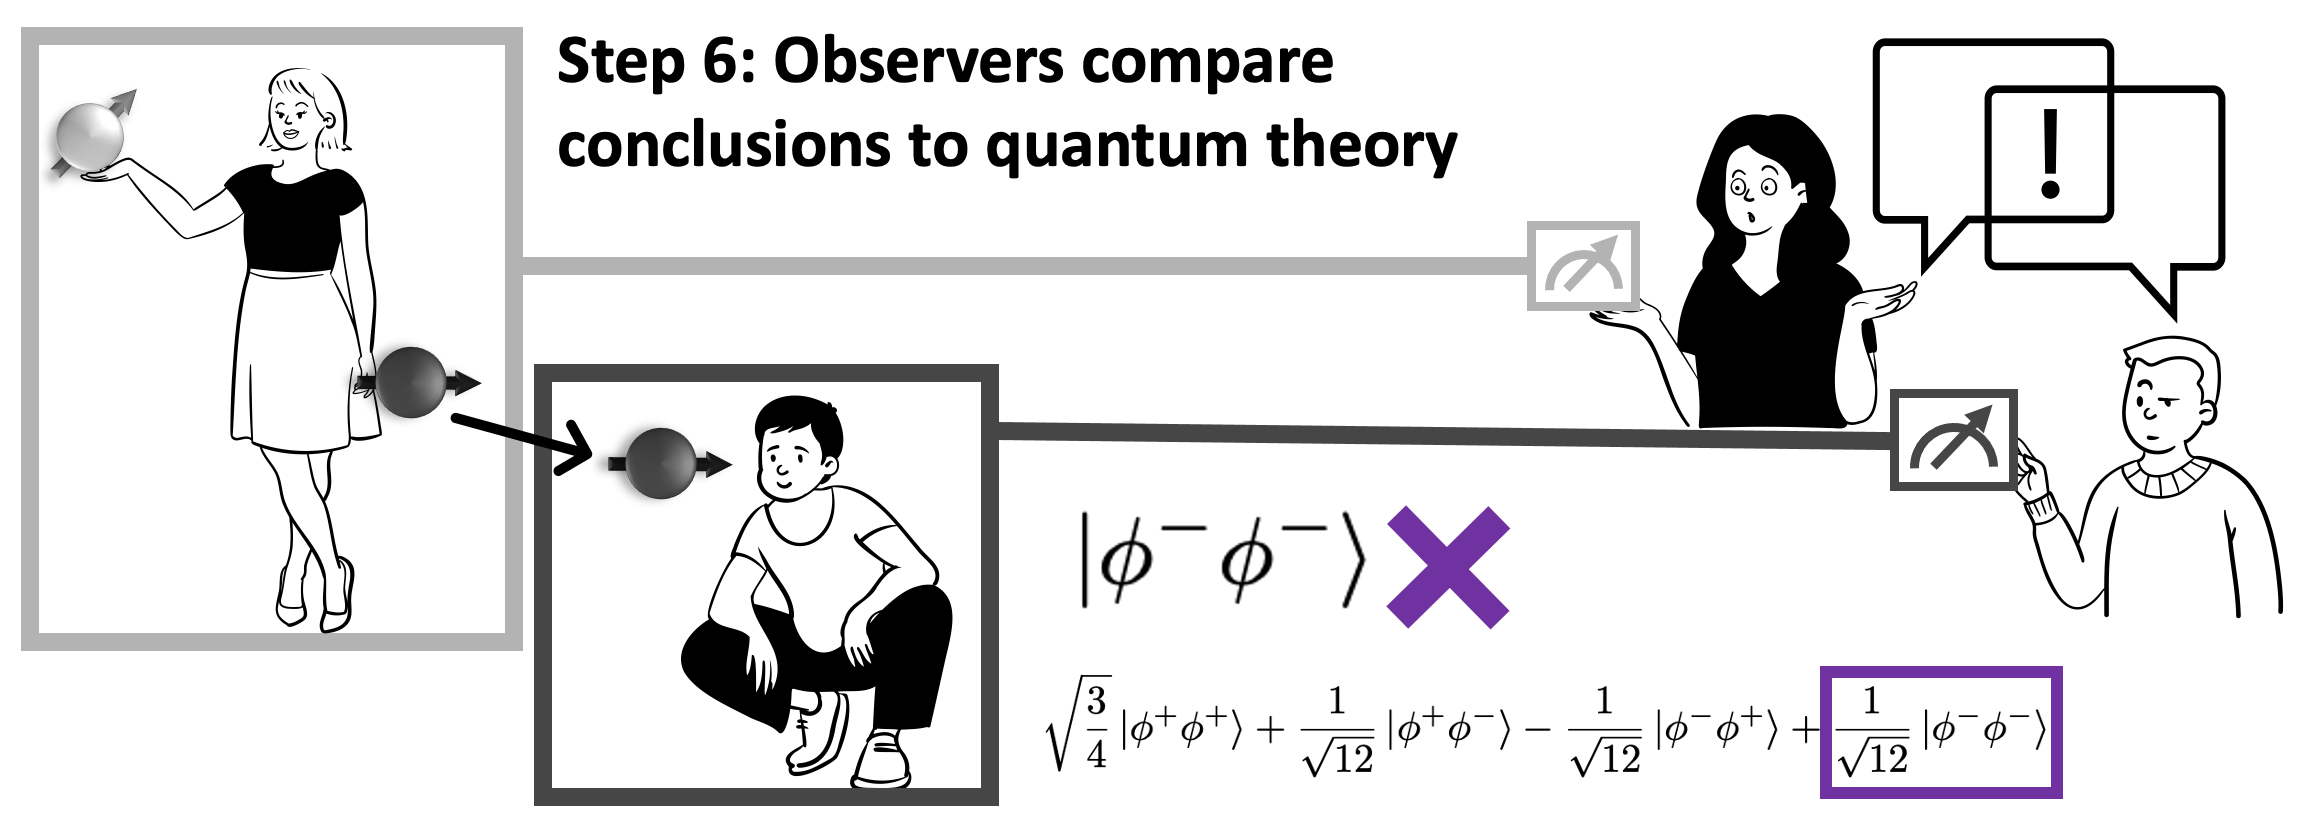

Таким образом, если рассуждения агентов верны, то квантовая теория оказывается неспособной описать наблюдателей, рассуждающих о квантовой теории. В своей оригинальной статье Фраухигер и Реннер утверждали, что для избегания парадокса нам придётся отказаться от некоторых стандартных предположений физики. Здесь я объясню свой способ понимания того, где именно рассуждения наблюдателей, которые я описал ранее, дают сбой.

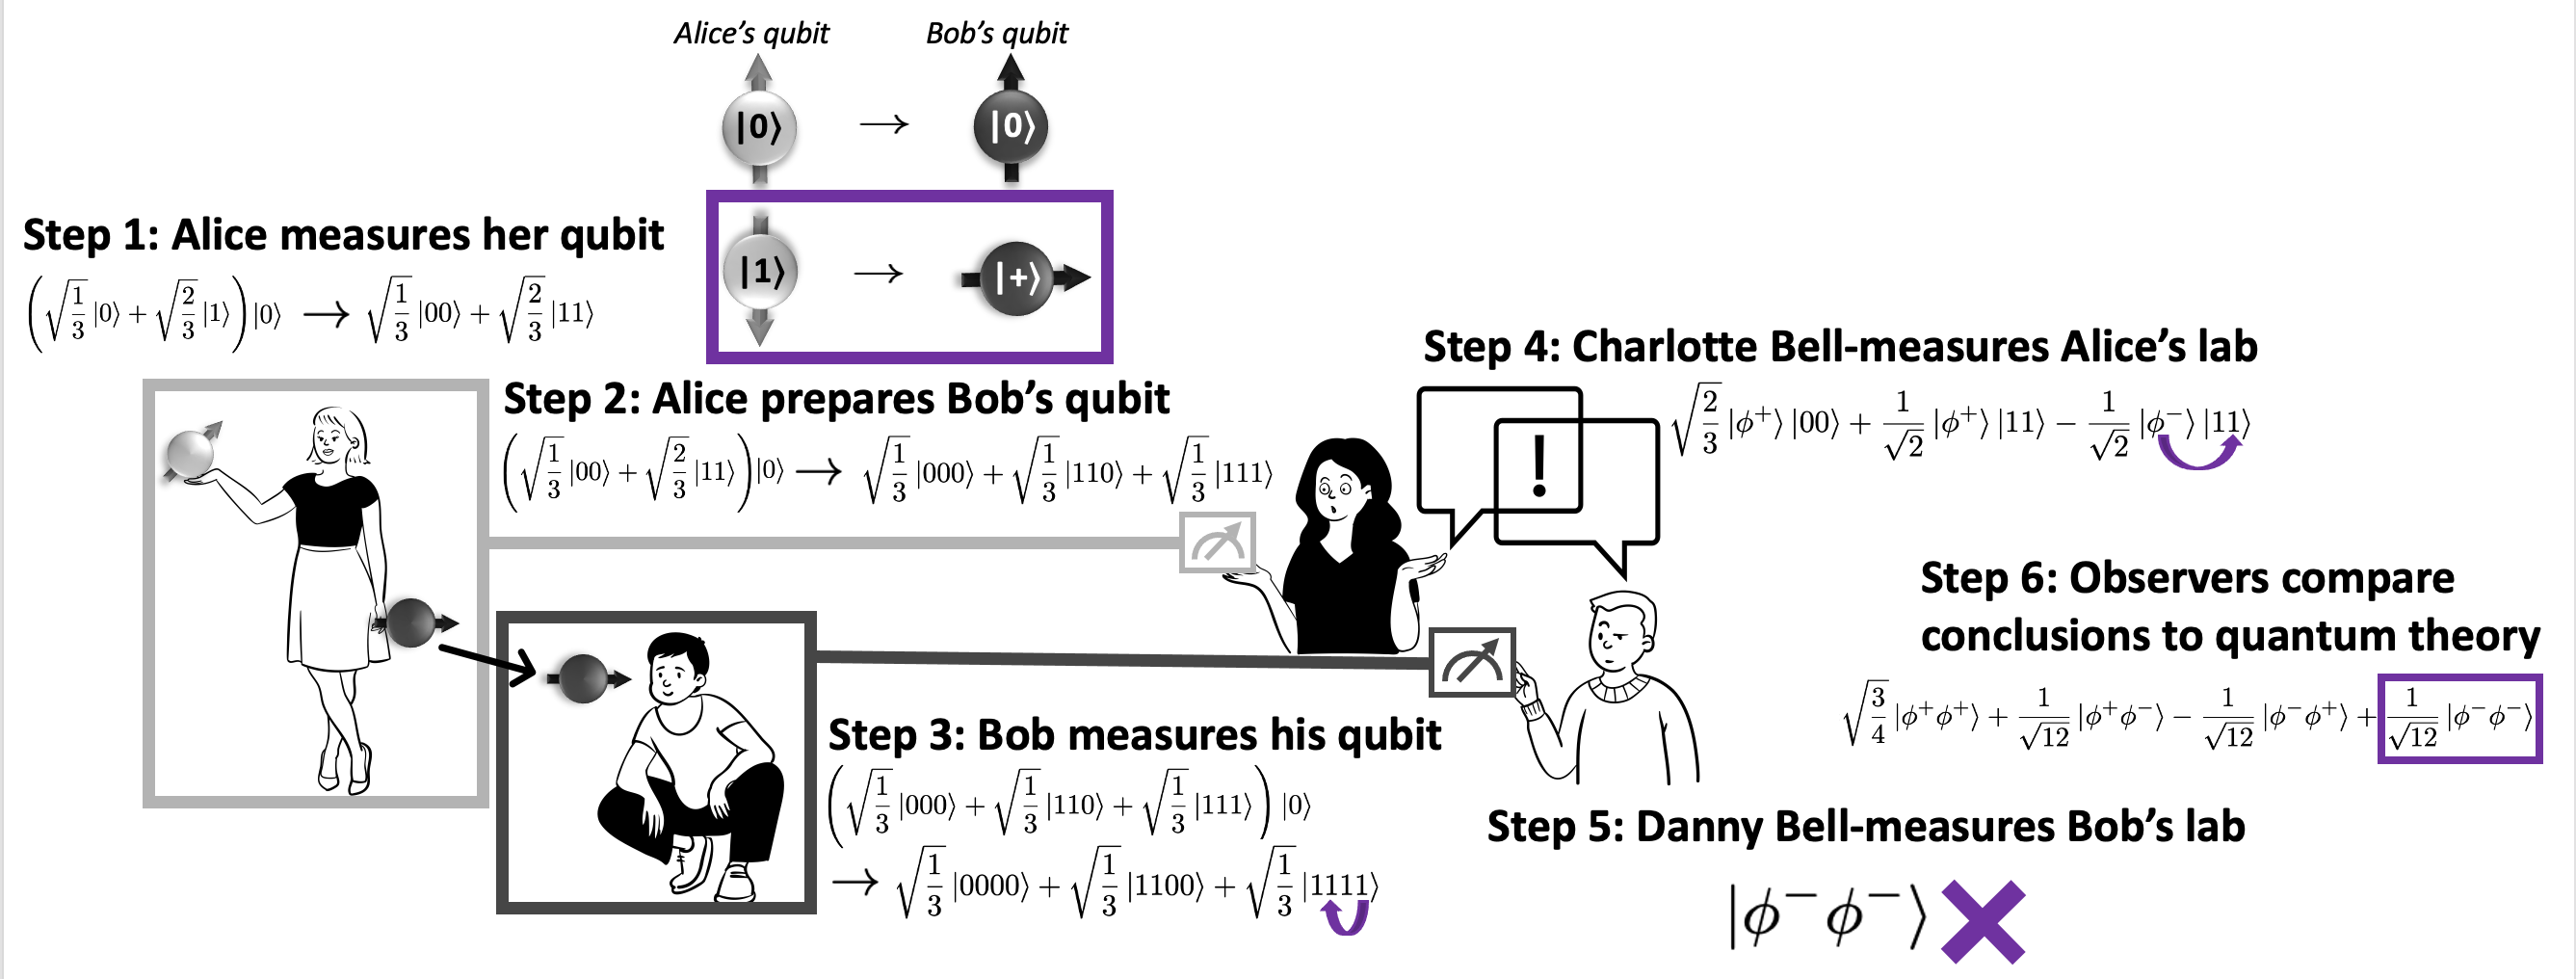

### Моё решение: друзья в разных базисах

Я думаю, что ключевая проблема заключается в связывании вывода Шарлотты о результате измерения Боба в прошлом с выводом Боба о результате измерения Алисы в прошлом.

Давайте посмотрим, где на квантовой схеме расположены измерения, которые выполняют Шарлотта, Алиса и Боб:

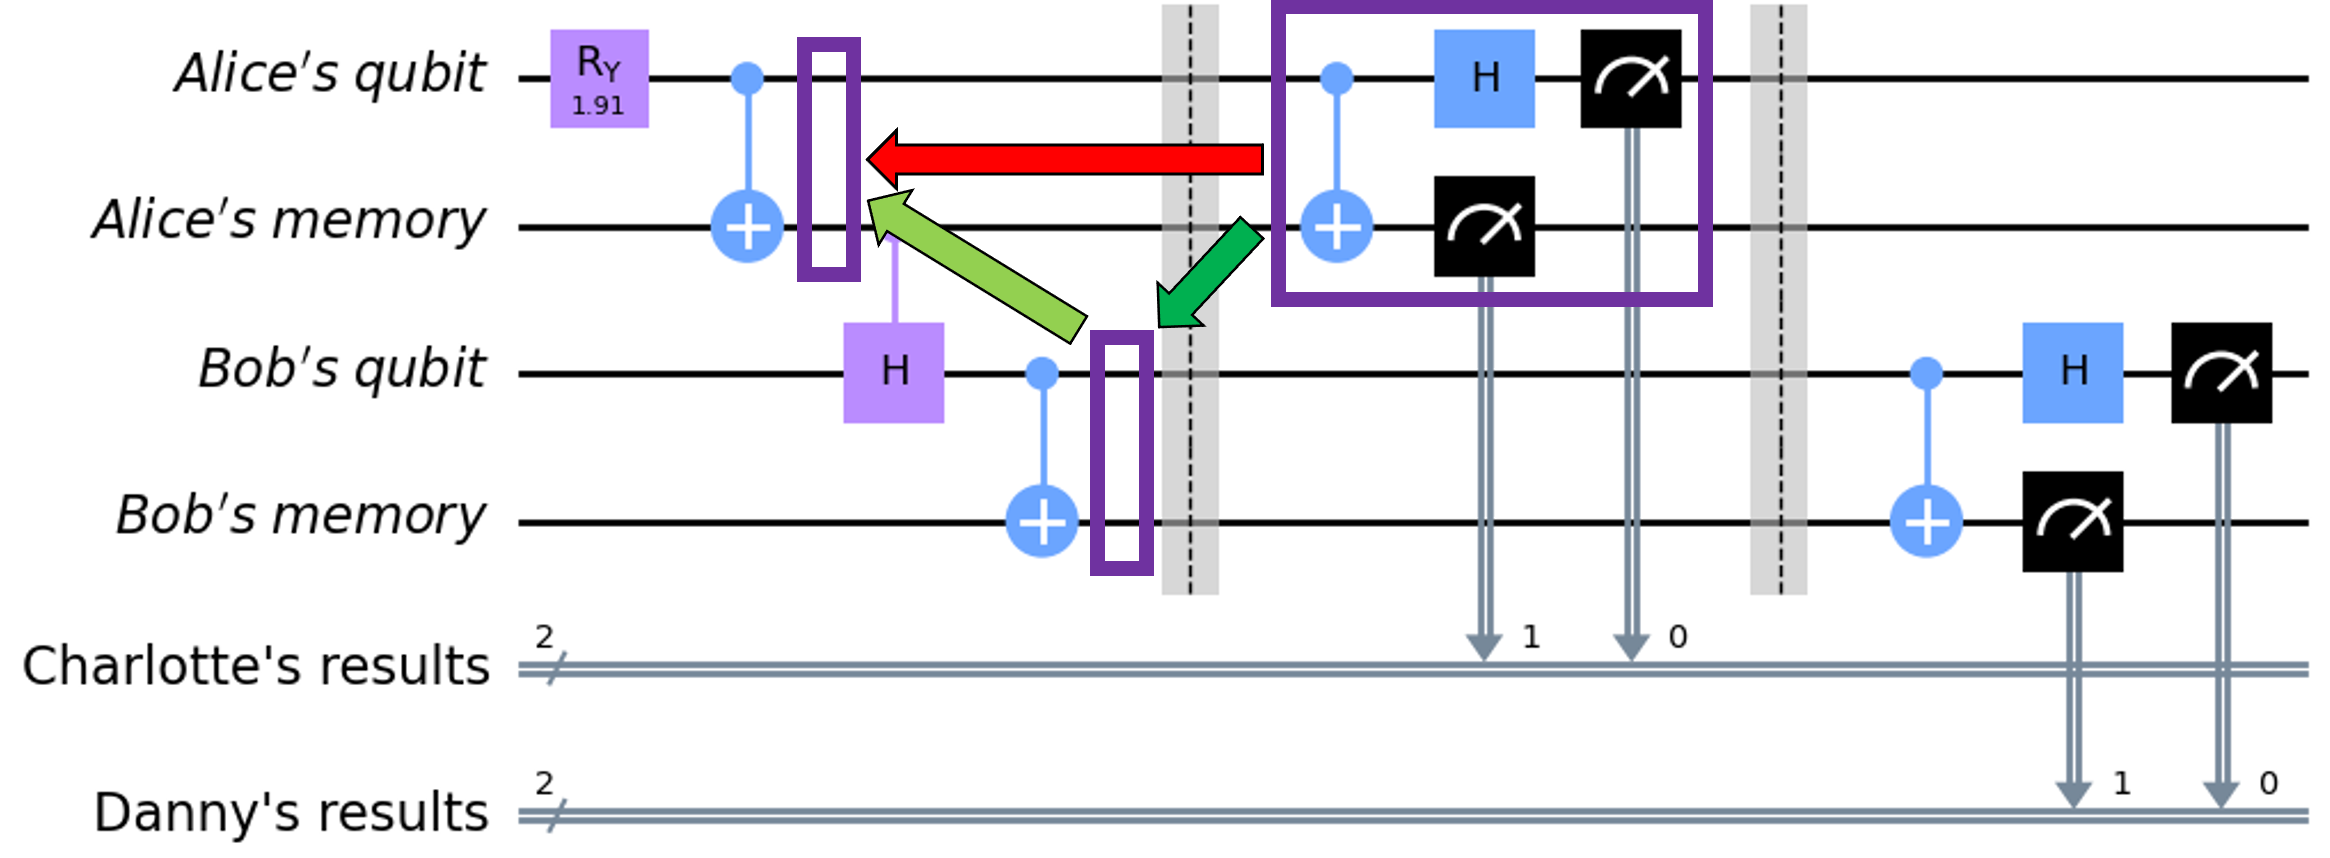

Базис, в котором Шарлотта измеряет Алису, — это базис Белла, тогда как базис, в котором Алиса измеряет свой кубит, — это вычислительный базис. Так же, как квантовая система не может иметь определённое состояние одновременно в X- и Z-базисах, лаборатория Алисы не может иметь определённое состояние одновременно в вычислительном базисе и базисе Белла. Это ещё одна версия принципа неопределённости Гейзенберга, согласно которому частица не может иметь одновременно определённые координату и импульс.

В мысленном эксперименте это означает, что нормально, если Шарлотта делает выводы о прошлом результате измерения Боба, а Боб — о результате измерения Алисы, потому что каждое из этих рассуждений происходит в совместимых базисах, относящихся к разным кубитам. Но Шарлотта не может использовать выводы Боба о прошлом результате Алисы, так как эти выводы основаны на измерительном базисе, несовместимом с базисом измерений Шарлотты.

Это существенно отличается от классической физики, где мы не сталкиваемся с проблемами при связывании выводов разных наблюдателей.

Если запретить связывать выводы Шарлотты и Боба, нет причин запрещать Дэнни измерять **ϕ⁻**, если Шарлотта измеряет **ϕ⁻**. Следовательно, нет противоречия с применением квантовой теории к рассуждениям о наблюдениях.

Эти рассуждения убеждают меня, что применение квантовой теории к наблюдателям самосогласованно. Однако этот вопрос остаётся открытой темой для обсуждения в квантовом сообществе. Разные исследователи предложили различные решения, и некоторые считают, что всё ещё остаются тонкости, которые нужно прояснить — например, связанные с точным описанием ситуаций, в которых наблюдатели могут или не могут использовать выводы друг друга.

### Наблюдатели как квантовые компьютеры

Я показал вам, как самостоятельно реализовать версию мысленного эксперимента с кубитами, используя Qiskit. Но есть ещё более фундаментальный способ вовлечь квантовые компьютеры в этот эксперимент. Возможное возражение против парадокса заключается в том, что когерентный контроль над человеческим наблюдателем технологически нереалистичен, даже в принципе. Альтернативным решением является замена четырёх человеческих наблюдателей на четыре квантовых компьютера, запрограммированных на рассуждения о своих результатах измерений. Это устраняет необходимость в осознанных агентах. Некоторые исследователи даже разработали квантовое программное обеспечение, которое позволяет увидеть, что происходит в мысленном эксперименте при использовании различных предположений о том, как наблюдатели должны рассуждать о своих результатах измерений.

В этом контексте моё решение парадокса остаётся тем же: квантовые компьютеры должны быть запрограммированы так, чтобы они не связывали выводы, относящиеся к кубитам в разных базисах.

В соответствии с принципом неопределённости Гейзенберга, при работе с любыми выводами в квантовой теории их можно применять одновременно только в том случае, если соответствующие измерения выполняются в совместимых базисах. Это позволяет избежать любых вариаций парадокса «Друг друга друга Вигнера».

В следующем видео мы вернёмся в 60-е годы, чтобы объяснить знаменитый эксперимент с двойной щелью, который демонстрирует странное явление волновой-частичной дуальности. До встречи, чтобы обсудить ещё больше квантовых мысленных экспериментов!